<a href="https://colab.research.google.com/github/GisangLee/deep_learning_network_calculation/blob/main/3_Dense_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Layer

### 의미

- neuron들의 집합




### 딥러닝 아키텍쳐
- correlation 필터들을 묶어놓은 필터뱅크를 구성하고, 그런 필터 뱅크들의 CASCADED구조


In [15]:
# Shape of CASCADED Dense Layer

import tensorflow as tf
from tensorflow.keras.layers import Dense

N, n_feature = 4, 10

n_neurons = [3, 5]

X = tf.random.normal(shape=(N, n_feature))

dense1 = Dense(
    units=n_neurons[0],
    activation="sigmoid"
)

dense2 = Dense(
    units=n_neurons[1],
    activation="sigmoid"
)

# forward propagation
A1 = dense1(X)
Y = dense2(A1)

# get weights
W1, B1 = dense1.get_weights()
W2, B2 = dense2.get_weights()

print(f"X : {X.shape}\n")
print(f"W1 : {W1.shape}\n")
print(f"B1 : {B1.shape}\n")


print(f"W2 : {W2.shape}\n")
print(f"B2 : {B2.shape}\n")
print(f"Y : {Y.shape}\n")



X : (4, 10)

W1 : (10, 3)

B1 : (3,)

W2 : (3, 5)

B2 : (5,)

Y : (4, 5)



In [21]:
# Dense Layer with Python List
import tensorflow as tf
from tensorflow.keras.layers import Dense

N, n_feature = 4, 10
X = tf.random.normal(shape=(N, n_feature))

n_neurons = [10, 20, 30, 40, 50, 60, 70, 80, 90, 10]


dense_layers = [Dense(units=n_neuron, activation="relu") for n_neuron in n_neurons]

print(f"Input : {X.shape}\n")

for dense_layer in dense_layers:
   
   X = dense_layer(X)
   print(f"afer dense layer : {X.shape}\n")

Y = X

Input : (4, 10)

afer dense layer : (4, 10)

afer dense layer : (4, 20)

afer dense layer : (4, 30)

afer dense layer : (4, 40)

afer dense layer : (4, 50)

afer dense layer : (4, 60)

afer dense layer : (4, 70)

afer dense layer : (4, 80)

afer dense layer : (4, 90)

afer dense layer : (4, 10)



In [28]:
# Output Calculations

import tensorflow as tf
from tensorflow.math import exp
from tensorflow.linalg import matmul
from tensorflow.keras.layers import Dense

N, n_feature = 4, 10

n_neurons = [3, 4, 5]

X = tf.random.normal(shape=(N, n_feature))
X_cp = tf.identity(X)

dense_layers = [Dense(units=n_neuron, activation="sigmoid") for n_neuron in n_neurons]
print(f"Input : {X.shape}\n")

# Calculate with Tensorflow
W, B = list(), list()
for dense_layer in dense_layers: 
   X = dense_layer(X)
   w, b = dense_layer.get_weights()

   W.append(w)
   B.append(b)

print(f" Y : {X.numpy()}\n")


# Calculate Manually
for layer_idx in range(len(n_neurons)):
  w, b = W[layer_idx], B[layer_idx]

  X_cp = matmul(X_cp, w) + b

  X_cp = 1 / ( 1 + exp(-X_cp))

print(f"X_cp : {X_cp}")



Input : (4, 10)

 Y : [[0.5181902  0.49622953 0.58280146 0.615788   0.3571646 ]
 [0.5132731  0.5224619  0.5645131  0.6157369  0.3551401 ]
 [0.526061   0.49761364 0.58161944 0.6196327  0.3594469 ]
 [0.5269201  0.5337797  0.5659893  0.6346274  0.3427872 ]]

X_cp : [[0.51819026 0.49622956 0.5828014  0.615788   0.35716456]
 [0.5132732  0.5224619  0.5645131  0.61573696 0.3551401 ]
 [0.526061   0.49761367 0.58161944 0.6196327  0.35944694]
 [0.5269201  0.5337797  0.5659893  0.6346274  0.34278718]]


## 2. Dense Layer

### 의미
- neuron마다 X벡터( 인풋 )들이 전부 들어가는 것

In [9]:
# Shapes of Dense Layer
import tensorflow as tf
from tensorflow.keras.layers import Dense

N, n_feauture = 8, 10
n_neuron = 3

X = tf.random.normal(shape=(N, n_feauture))
dense = Dense(
    units=n_neuron,
    activation="sigmoid"
)

Y = dense(X)

W, B = dense.get_weights()
print("==== Input / Weight / Biase ====" )
print(f"X : {X.shape}\n")
print(f"W : {W.shape}\n")
print(f"B : {B.shape}\n")
print(f"Y : {Y.shape}\n")

==== Input / Weight / Biase ====
X : (8, 10)

W : (10, 3)

B : (3,)

Y : (8, 3)



In [13]:
# Output Calculations

import numpy as np
from tensorflow.math import exp
import tensorflow as tf
from tensorflow.keras.layers import Dense

N, n_feauture = 8, 10
n_neuron = 3

X = tf.random.normal(shape=(N, n_feauture))
dense = Dense(
    units=n_neuron,
    activation="sigmoid"
)

Y_tf = dense(X)
W, B = dense.get_weights()

print(f"Y ( Tensorflow ) : {Y_tf.numpy()}\n")

# calculate with matrix multiplication
Z = tf.linalg.matmul(X, W) + B
Y_man = 1 / ( 1 + exp(-Z))

print(f" Y ( manually ) : {Y_man}")

# calculate with dot product
Y_man_vec = np.zeros(shape=(N, n_neuron))

for x_idx in range(N):

  x = X[x_idx]

  for neuron_idx in range(n_neuron):
    w, b = W[:, neuron_idx], B[neuron_idx]

    z = tf.reduce_sum(x * w) + b
    a = 1 / ( 1 + exp(-z))

    Y_man_vec[x_idx, neuron_idx] = a

print(f"Y ( Dot Product ) : {Y_man_vec}")


Y ( Tensorflow ) : [[0.0909384  0.18172914 0.44072816]
 [0.7761032  0.38287255 0.41681838]
 [0.13066201 0.5092937  0.401129  ]
 [0.39448395 0.36124188 0.3459256 ]
 [0.61532825 0.47441527 0.29117158]
 [0.5856652  0.74464244 0.7249154 ]
 [0.8881772  0.3926941  0.3551661 ]
 [0.6591201  0.25502506 0.42648956]]

 Y ( manually ) : [[0.0909384  0.18172914 0.44072816]
 [0.77610314 0.38287258 0.41681838]
 [0.13066201 0.5092936  0.40112904]
 [0.39448395 0.3612419  0.3459256 ]
 [0.61532825 0.47441527 0.2911716 ]
 [0.5856652  0.74464244 0.7249154 ]
 [0.8881772  0.39269406 0.3551661 ]
 [0.6591201  0.25502506 0.42648956]]
Y ( Dot Product ) : [[0.0909384  0.18172909 0.44072816]
 [0.77610314 0.38287261 0.41681841]
 [0.13066201 0.50929368 0.40112904]
 [0.39448389 0.36124191 0.3459256 ]
 [0.61532825 0.47441527 0.29117161]
 [0.58566523 0.74464238 0.72491539]
 [0.88817722 0.39269406 0.35516614]
 [0.65912008 0.25502506 0.42648953]]


## 3. The First Dense Layer

### Params of Dense Layer

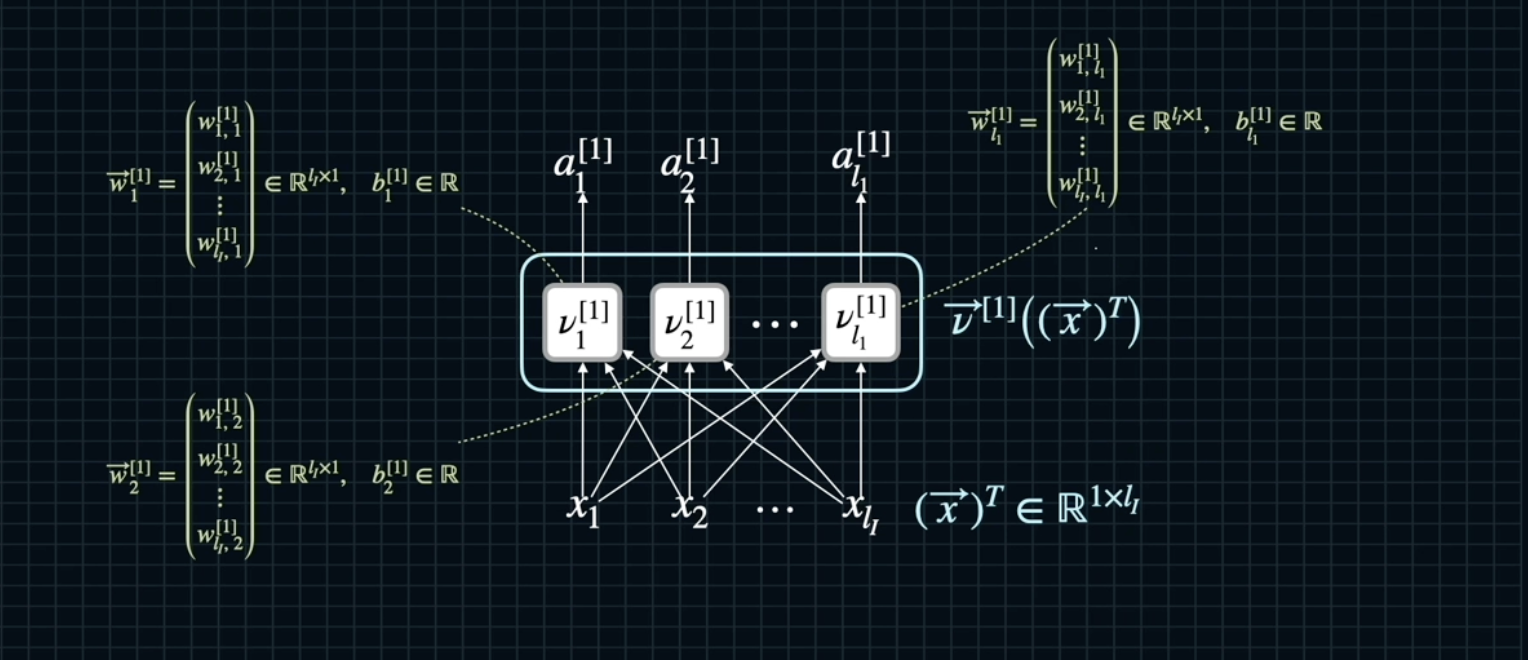
